<a href="https://colab.research.google.com/github/nastaran-farhadi/Machine-learning-practice/blob/main/Clustering_Hierarchical_for_Mal_Customer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/jadi/Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

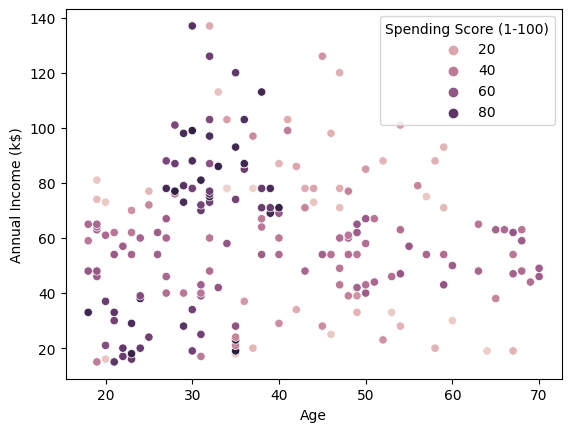

In [6]:
import seaborn as sns
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Spending Score (1-100)')

In [7]:
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [ ]:
gender.head(5)

,Male
0,1
1,1
2,0
3,0
4,0


In [8]:
df = pd.concat([df,gender], axis=1)

In [9]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [10]:
df= df.drop(['Gender'],axis =1)

In [11]:
df.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [12]:
from scipy.cluster.hierarchy import  linkage,dendrogram
complete_clustering=linkage(df,method="ward",metric="euclidean")

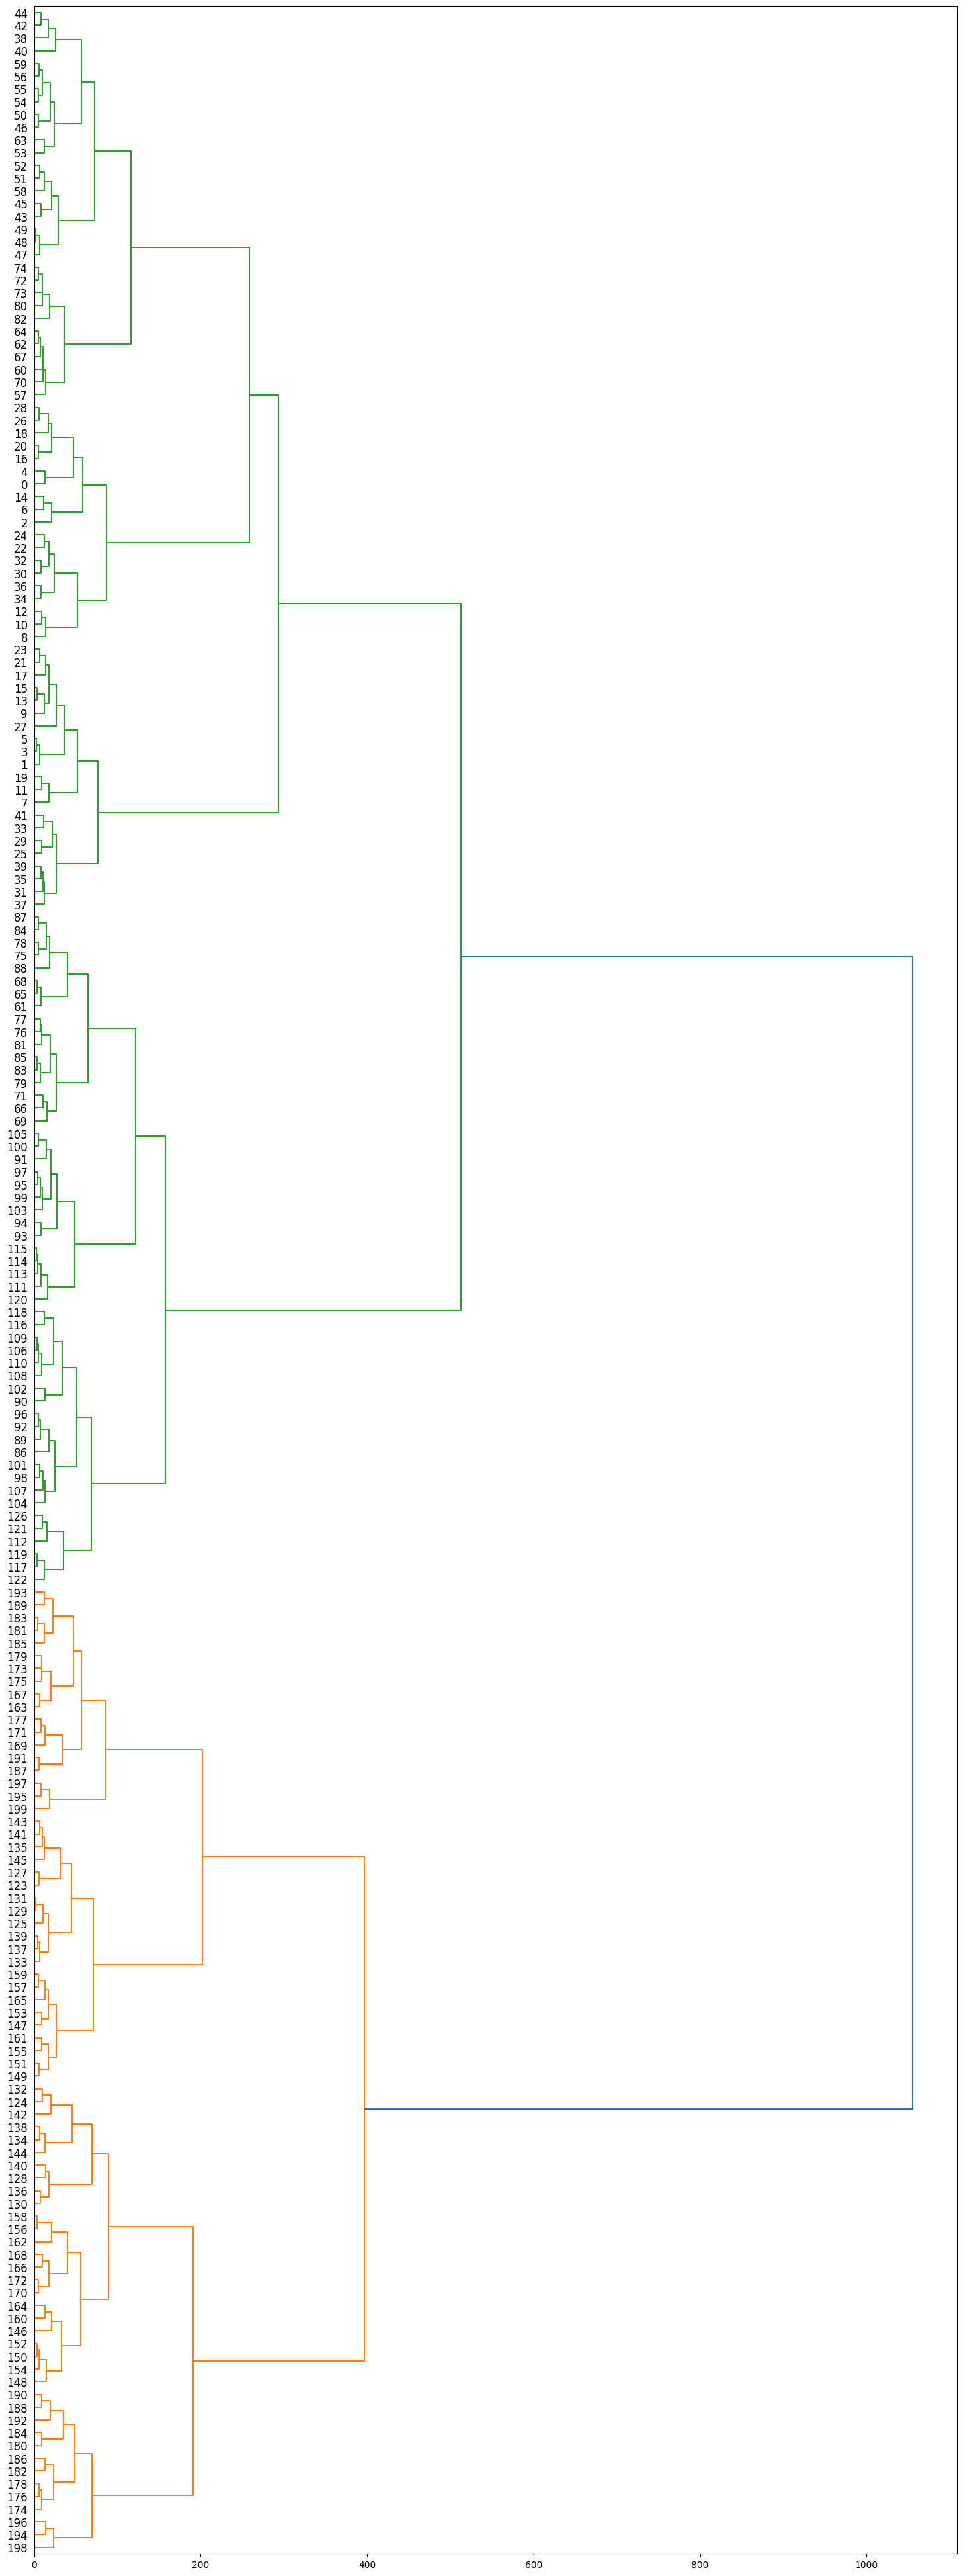

In [16]:
from matplotlib import pylab
from pylab import *
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Spending Score (1-100)'][id], df['Annual Income (k$)'][id], int(float(df['Age'][id])) )
dendrogram(complete_clustering, leaf_rotation=0,leaf_font_size=12,orientation='right')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(df)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])